<a href="https://colab.research.google.com/github/mona-sh/finalproject/blob/main/finallproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries/Redeaing dataset

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#moduls for predicitons
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
#read dataaset
df=pd.read_csv("/content/dataset/Salary Data.csv")


In [ ]:
#EDA
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


#Descriptive analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


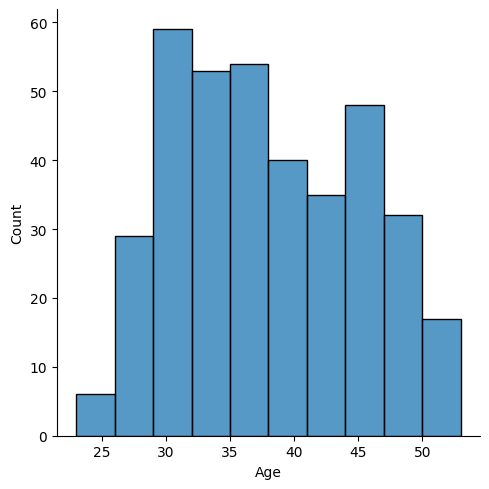

In [ ]:
sns.displot(df['Age'])


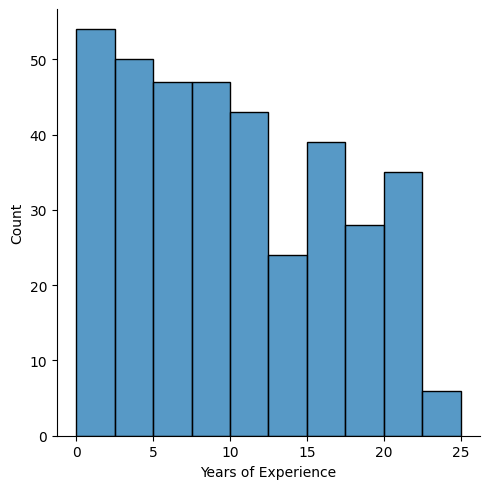

In [ ]:
sns.displot(df['Years of Experience'])


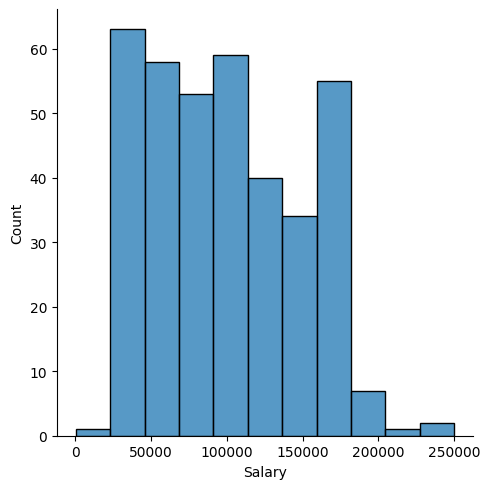

In [ ]:
sns.displot(df['Salary'])


The correlation coefficient between age and years of experience is 0.98, indicating an exceptionally strong positive correlation.

The correlation coefficient between salary and years of experience is 0.93, indicating a very strong positive correlation. This means that as the number of years of experience increases, there is a substantial tendency for salaries to also increase.


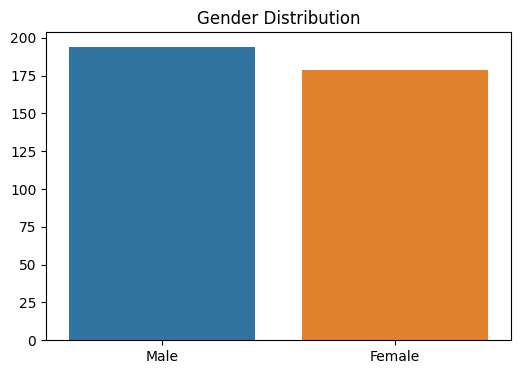

In [ ]:
# Categorical Summary and Visualization for Gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.show()


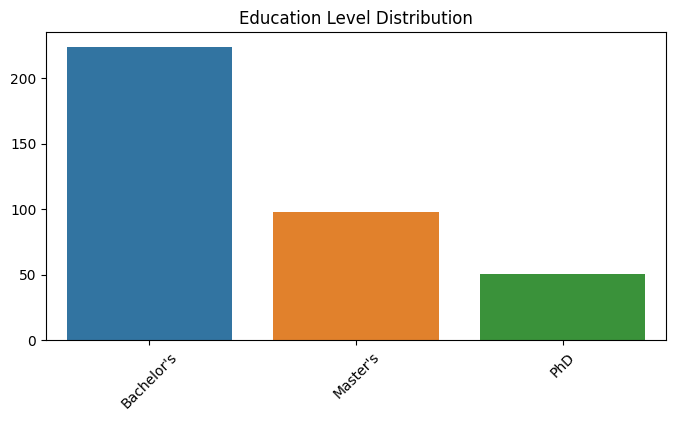

In [ ]:
# Categorical Summary and Visualization for Education Level
education_counts = df['Education Level'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

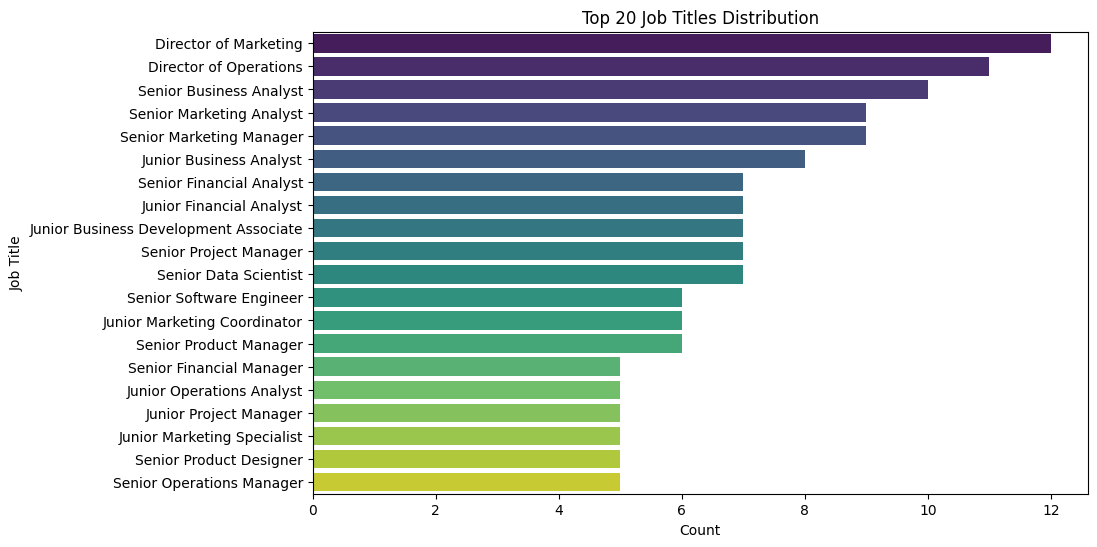

In [ ]:
# Categorical Summary and Visualization for Job Tilte
top_job_counts = df['Job Title'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_counts.values, y=top_job_counts.index, palette='viridis')  #
plt.title('Top 20 Job Titles Distribution')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


#Outliers

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


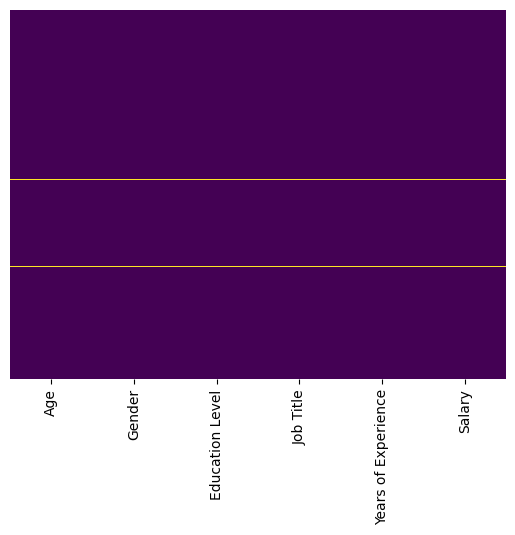

In [ ]:
#Outliers values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df[df.isnull().any(axis=1)]



In [ ]:
#Preprocessing(dealing with missing values)
df.dropna(inplace=True)
df.drop_duplicates()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


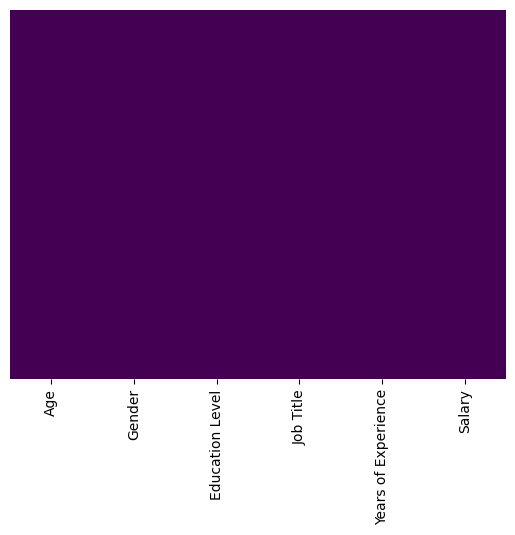

In [ ]:
#after
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df[df.isnull().any(axis=1)]


#Attribute relationship  


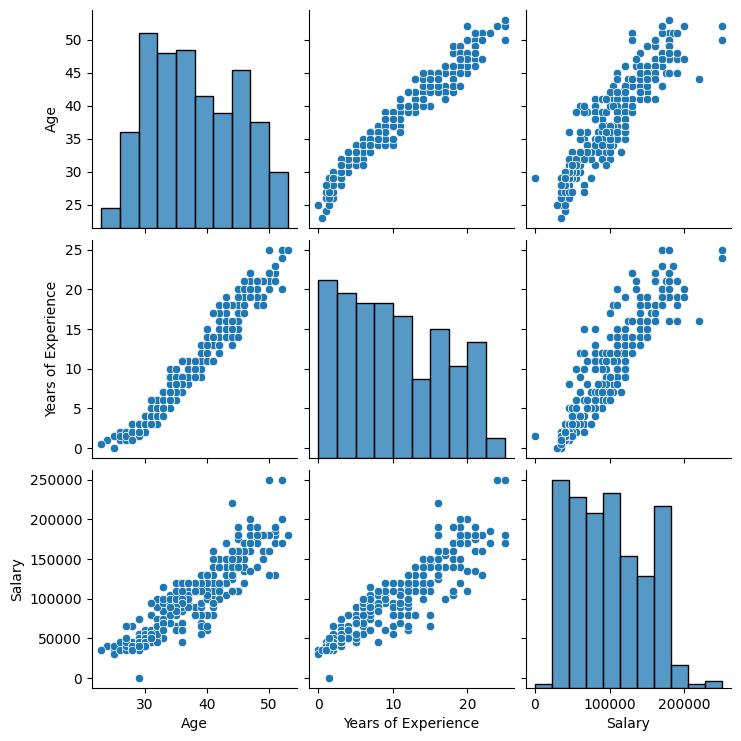

In [ ]:
#realtions between attributes
sns.pairplot(df)

<ipython-input-155-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

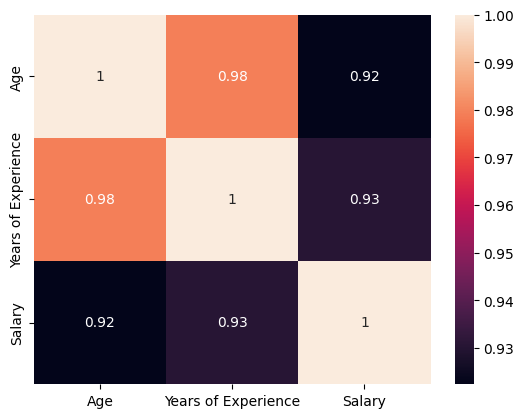

In [ ]:
sns.heatmap(df.corr(), annot=True)


In [ ]:
# ecategorize the gender and Education Level column
df_standariser=df
dic_gender={"Male":0,"Female":1}
df_standariser['Gender']=df_standariser['Gender'].map(dic_gender)

In [ ]:
dic_job={"Bachelor's":1,"Master's":2,"PhD":3}
df_standariser['Education Level']=df_standariser['Education Level'].map(dic_job)

In [ ]:
standardized_correlation_matrix= df_standariser.corr()
standardized_correlation_matrix

<ipython-input-158-88e80ed15527>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  standardized_correlation_matrix= df_standariser.corr()


,Age,Gender,Education Level,Years of Experience,Salary
Age,1.000000,0.020324,0.562693,0.979128,0.922335
Gender,0.020324,1.000000,0.044717,-0.002884,-0.071106
Education Level,0.562693,0.044717,1.000000,0.590863,0.670371
Years of Experience,0.979128,-0.002884,0.590863,1.000000,0.930338
Salary,0.922335,-0.071106,0.670371,0.930338,1.000000


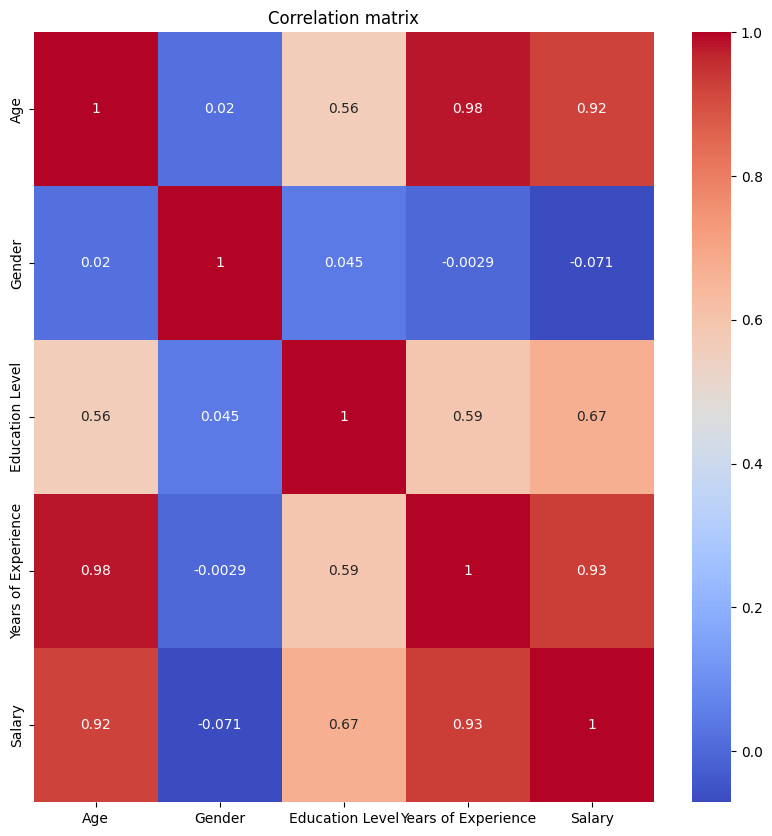

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(standardized_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

#predictive model and evalutaing the models

In [ ]:
#We only need the data from 5 and 6 columns,so we need to do the data slicing. .
X = df.iloc[:, 4].values.reshape(-1, 1)
y = df.iloc[:, 5].values.reshape(-1, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)


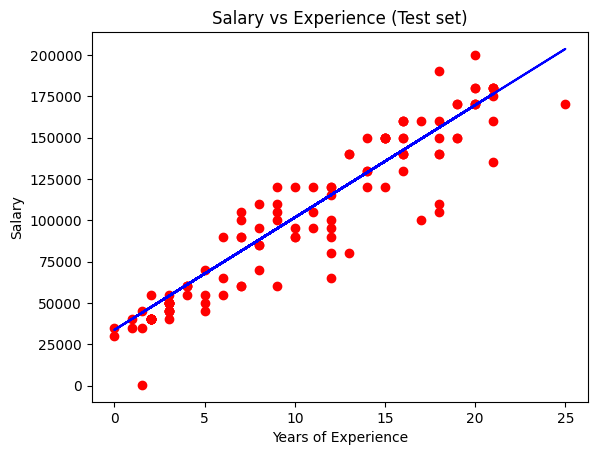

In [37]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [38]:
regressor.predict([[22]])
#The actual value of the salary in the dataset for 1.2 yrs of experince was: 180000

array([[183185.21656292]])

In [39]:
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 88.0%


In [40]:
print(regressor.coef_)
print(regressor.intercept_)

[[6797.37440174]]
[33642.9797247]
